<a href="https://colab.research.google.com/github/rant95/Dogs_vs_Cats/blob/main/dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dogs and Cats Classification

---
Lova Rantoanison


---
18- 10 -2020

#*1*.Introduction

The objectif is to predict that is a cat or dog with an input image. We take cats_and_dogs _filtered for this classification.

# Importing packages

Let's start by importing required packages:

*   os — to read files and directory structure
*   numpy — for some matrix math outside of TensorFlow
*   matplotlib.pyplot — to plot the graph and display images in our training and validation data

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Data Loading

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

dir='/content/drive/My Drive/Colab Notebooks/dogcatfilter/cats_and_dogs_filtered/'

zip_dir = tf.keras.utils.get_file(dir+'cats_and_dogs_filterted.zip', origin=_URL, extract=True)





The dataset we have downloaded has following directory structure.

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

We'll now assign variables with the proper file path for the training and validation sets.

In [ ]:
dir='/content/drive/My Drive/Colab Notebooks/dogcatfilter/'
base_dir = os.path.join(os.path.dirname(dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')



In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

### Understanding our data

Let's look at how many cats and dogs images we have in our training and validation directory

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


### See Total In count

##Folder train

In [ ]:
filenames = os.listdir(train_cats_dir)
filenamese = os.listdir(train_dogs_dir)
categories = []
categoriese = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

for filename in filenamese:
    categorys = filename.split('.')[0]
    if categorys == 'dog':
        categoriese.append(1)
    else:
        categoriese.append(0)


df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

df2 = pd.DataFrame({
    'filename': filenamese,
    'category': categoriese
})

df2.head()

,filename,category
0,dog.1.jpg,1
1,dog.0.jpg,1
2,dog.100.jpg,1
3,dog.10.jpg,1
4,dog.101.jpg,1


In [ ]:
df.head()

,filename,category
0,cat.1.jpg,0
1,cat.0.jpg,0
2,cat.100.jpg,0
3,cat.10.jpg,0
4,cat.101.jpg,0


In [ ]:
df3=df.append(df2)

In [ ]:
df3.tail()

,filename,category
995,dog.994.jpg,1
996,dog.998.jpg,1
997,dog.999.jpg,1
998,dog.997.jpg,1
999,dog.996.jpg,1


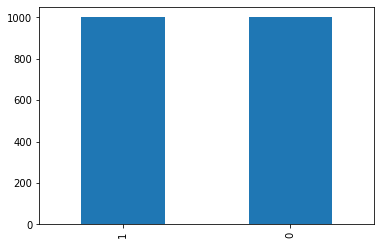

In [ ]:
df3['category'].value_counts().plot.bar()

In [ ]:
df3[df3['category']==1].value_counts().sum()



1000

In [ ]:
df3[df3['category']==0].value_counts().sum()

1000

From our data we have 1000 cats and 1000 dogs

##Folder Validation

In [ ]:
filenames = os.listdir(validation_cats_dir)
filenamese = os.listdir(validation_dogs_dir)
categories = []
categoriese = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

for filename in filenamese:
    categorys = filename.split('.')[0]
    if categorys == 'dog':
        categoriese.append(1)
    else:
        categoriese.append(0)


df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

df2 = pd.DataFrame({
    'filename': filenamese,
    'category': categoriese
})

df2.head()

,filename,category
0,dog.2029.jpg,1
1,dog.2002.jpg,1
2,dog.2006.jpg,1
3,dog.2008.jpg,1
4,dog.2014.jpg,1


In [ ]:
df.head()


,filename,category
0,cat.2000.jpg,0
1,cat.2011.jpg,0
2,cat.2006.jpg,0
3,cat.2003.jpg,0
4,cat.2007.jpg,0


In [ ]:
df4=df.append(df2)

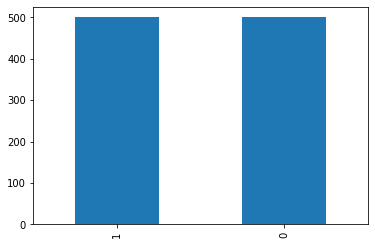

In [ ]:
df4['category'].value_counts().plot.bar()

In [ ]:
df4[df4['category']==1].value_counts().sum()

500

In [ ]:
df4[df4['category']==0].value_counts().sum()

500

From our data we have 500 cats and 500 dogs

# Setting Model Parameters

For convenience, let us set up variables that will be used later while pre-processing our dataset and training our network.

In [ ]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels

After defining our generators for training and validation images, **flow_from_directory** method will load images from the disk and will apply rescaling and will resize them into required dimensions using single line of code.

# Data Augmentation

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

### Flipping the image horizontally

We can begin by randomly applying horizontal flip augmentation to our dataset and seeing how individual images will look after the transformation. This is achieved by passing `horizontal_flip=True` as an argument to the `ImageDataGenerator` class.

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


To see the transformation in action, let's take one sample image from our training set and repeat it five times. The augmentation will be randomly applied (or not) to each repetition.

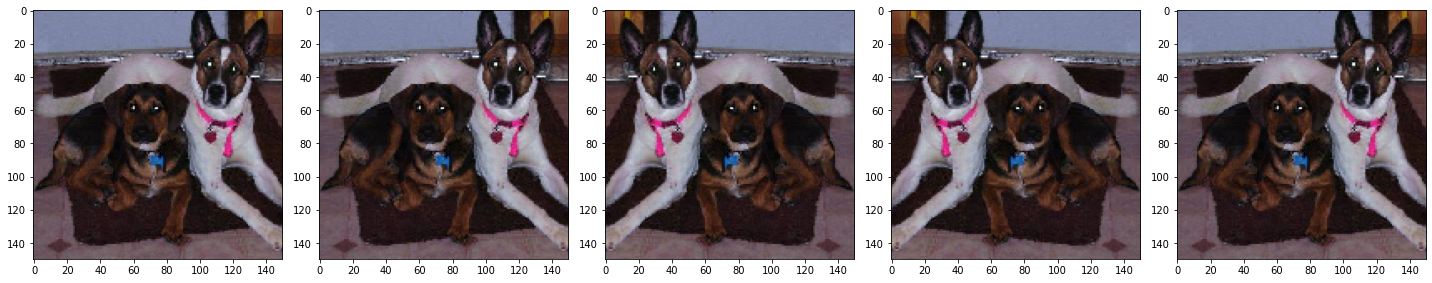

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Rotating the image

The rotation augmentation will randomly rotate the image up to a specified number of degrees. Here, we'll set it to 45.

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


To see the transformation in action, let's once again take a sample image from our training set and repeat it. The augmentation will be randomly applied (or not) to each repetition.

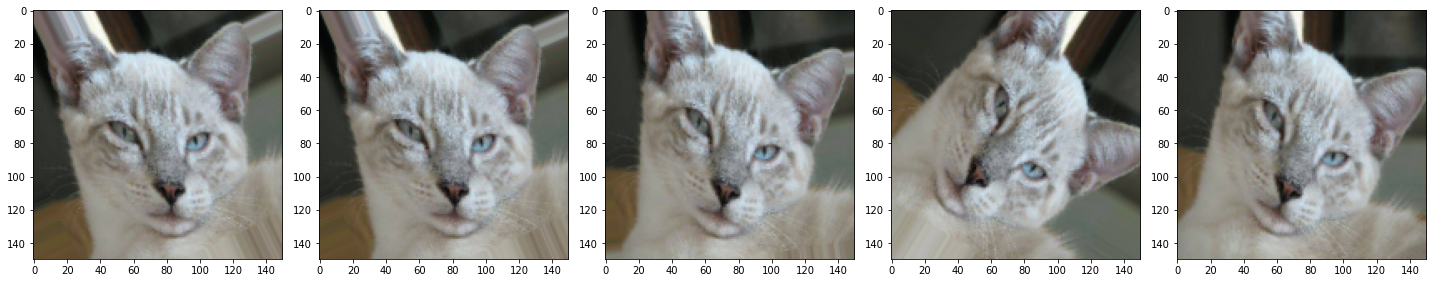

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Applying Zoom

We can also apply Zoom augmentation to our dataset, zooming images up to 50% randomly.

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 2000 images belonging to 2 classes.


One more time, take a sample image from our training set and repeat it. The augmentation will be randomly applied (or not) to each repetition.

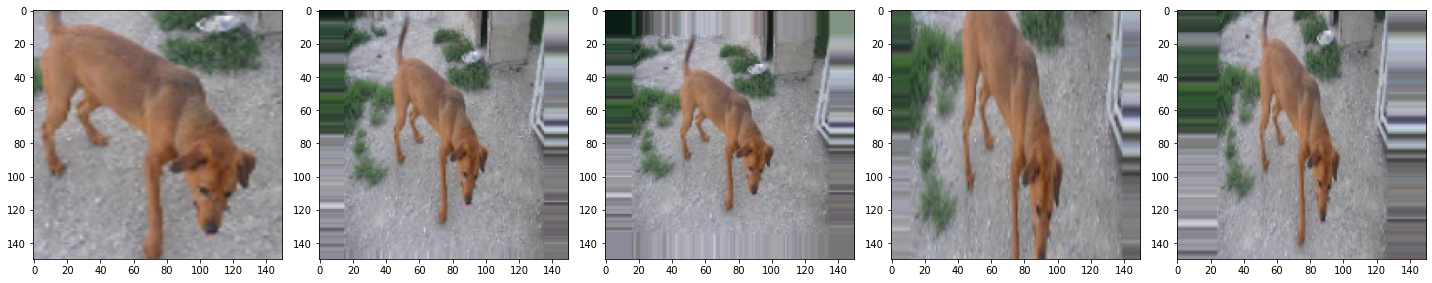

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Putting it all together

We can apply all these augmentations, and even others, with just one line of code, by passing the augmentations as arguments with proper values.

Here, we have applied rescale, rotation of 45 degrees, width shift, height shift, horizontal flip, and zoom augmentation to our training images.

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


Let's visualize how a single image would look like five different times, when we pass these augmentations randomly to our dataset. 

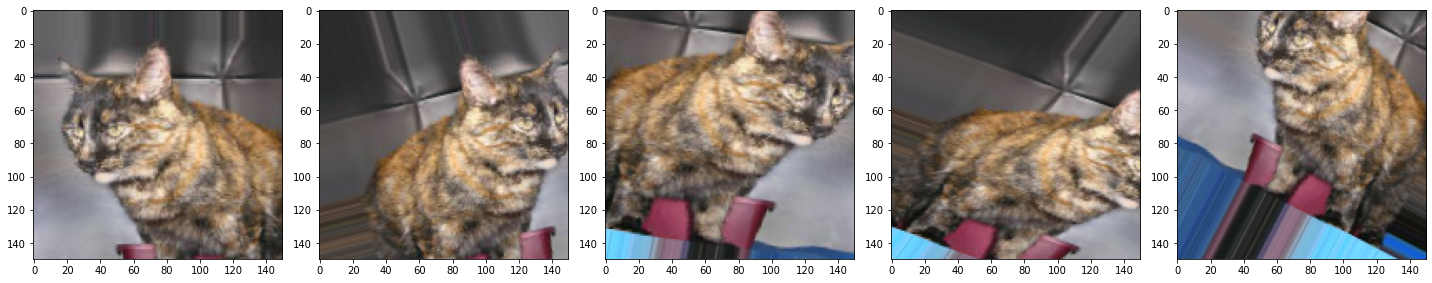

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Creating Validation Data generator

Generally, we only apply data augmentation to our training examples, since the original images should be representative of what our model needs to manage. So, in this case we are only rescaling our validation images and converting them into batches using ImageDataGenerator.

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


# Model Creation

## Define the model

The model consists of four convolution blocks with a max pool layer in each of them.

Before the final Dense layers, we're also applying a Dropout probability of 0.5. It means that 50% of the values coming into the Dropout layer will be set to zero. This helps to prevent overfitting.

Then we have a fully connected layer with 512 units, with a `relu` activation function. The model will output class probabilities for two classes — dogs and cats — using `softmax`. 

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

### Compiling the model

As usual, we will use the `adam` optimizer. Since we output a softmax categorization, we'll use `sparse_categorical_crossentropy` as the loss function. We would also like to look at training and validation accuracy on each epoch as we train our network, so we are passing in the metrics argument.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model Summary

Let's look at all the layers of our network using **summary** method.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
import datetime
from keras.callbacks import EarlyStopping, ModelCheckpoint
path = '/content/drive/My Drive/Colab Notebooks/dogcatfilter/'
epochs = 100
#learning_rate = 0.001

# checkpoints
early_stopping = EarlyStopping(monitor='val_acc', patience=5)
STAMP = "{}_dogcat_breed_model".format(datetime.date.today().strftime("%Y-%m-%d"))

bst_model_path = "{}.h5".format(STAMP)
model_checkpoint = ModelCheckpoint(bst_model_path,
                                   save_best_only=True,
                                   save_weights_only=False,
                                  verbose=1)

### Train the model

It's time we train our network.

Since our batches are coming from a generator (`ImageDataGenerator`), we'll use `fit_generator` instead of `fit`.

In [ ]:
epochs=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
20/20 [==============================] - 591s 30s/step - loss: 0.7112 - accuracy: 0.5155 - val_loss: 0.6884 - val_accuracy: 0.5400
Epoch 2/100
20/20 [==============================] - 20s 998ms/step - loss: 0.6906 - accuracy: 0.5355 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 20s 992ms/step - loss: 0.6893 - accuracy: 0.5190 - val_loss: 0.6782 - val_accuracy: 0.5910
Epoch 4/100
20/20 [==============================] - 20s 979ms/step - loss: 0.6744 - accuracy: 0.5620 - val_loss: 0.6921 - val_accuracy: 0.5010
Epoch 5/100
20/20 [==============================] - 20s 977ms/step - loss: 0.6907 - accuracy: 0.5000 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 6/100
20/20 [==============================] - 20s 976ms/step - loss: 0.6893 - accuracy: 0.5040 - val_loss: 0.6887 - val_accuracy: 0.5520
Epoch 7/100
20/20 [==============================] - 19s 970m

In [ ]:
# serialize weights to HDF5
model.save(dir+bst_model_path)
print("Saved model to disk")

Saved model to disk


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
bst_model_path="/content/drive/My Drive/Colab Notebooks/dogcatfilter/2020-10-17_dogcat_breed_model.h5"
from tensorflow.keras import layers
reloaded = tf.keras.models.load_model(bst_model_path, 
  # `custom_objects` tells keras how to load a `hub.KerasLayer`
  custom_objects={'KerasLayer': hub.KerasLayer})

reloaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model=reloaded

### Visualizing results of the training

We'll now visualize the results we get after training our network.

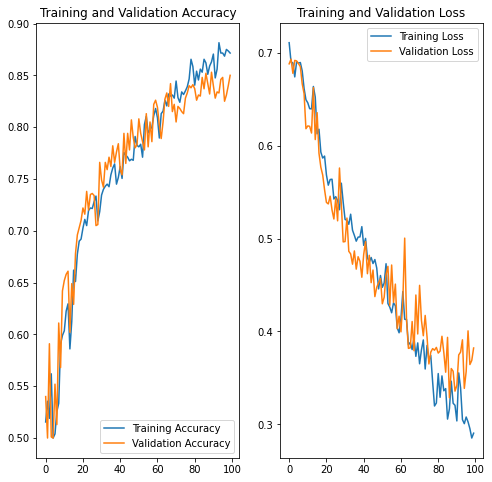

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Test prediction

In [ ]:
df4.sample(10)

,filename,category
135,dog.2142.jpg,1
92,dog.2110.jpg,1
327,dog.2302.jpg,1
268,dog.2282.jpg,1
280,cat.2256.jpg,0
71,cat.2026.jpg,0
157,dog.2182.jpg,1
82,dog.2118.jpg,1
328,dog.2328.jpg,1
200,cat.2224.jpg,0


In [ ]:
df4.loc[df4['filename']== "dog.2182.jpg",["filename","category"]]

,filename,category
157,dog.2182.jpg,1


(1, 150, 150, 3)


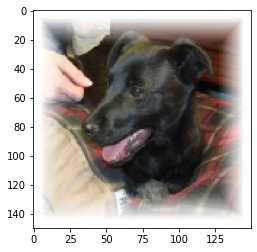

[[-0.26273766  0.27421612]]
chien


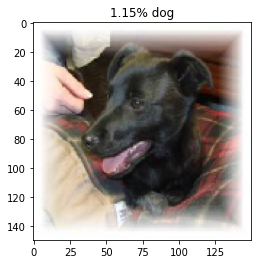

In [ ]:
img_path = '/content/drive/My Drive/Colab Notebooks/dogcatfilter/cats_and_dogs_filtered/validation/dogs/dog.2182.jpg'
#img_path ="/content/drive/My Drive/Colab Notebooks/dog/Miniature-Shar-Pei-2.jpg"
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()
prediction = model.predict(img_tensor)


print(prediction)
if (prediction[0,1] < 0): print("chat ") 
else:
  print("chien")


  plt.imshow(img_tensor[0])
if prediction[0,1] < 0:
        plt.title("%.2f" % ((abs(prediction[0,0]+prediction[0,1]))*100)  + "% cat")
else:
        plt.title("%.2f" % (abs((prediction[0,0]+prediction[0,1]))*100)  + "% dog")

plt.show()

(1, 150, 150, 3)


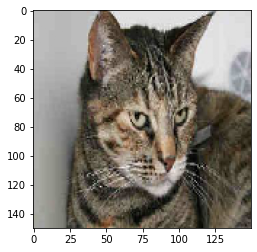

[[ 1.643816  -1.4728811]]
chat 
17.093491554260254


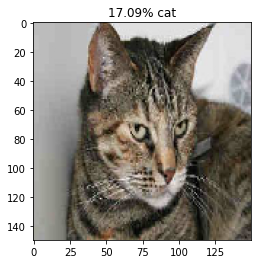

In [ ]:
img_path = '/content/drive/My Drive/Colab Notebooks/dogcatfilter/cats_and_dogs_filtered/validation/cats/cat.2322.jpg'

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()
prediction = model.predict(img_tensor)


print(prediction)

if (prediction[0,1] < 0): print("chat ") 
else:
  print("chien")

print(abs(prediction[0,0]+prediction[0,1])*100)

plt.imshow(img_tensor[0])
if prediction[0,1] < 0:
        plt.title("%.2f" % ((abs(prediction[0,0]+prediction[0,1]))*100) + "% cat")
else:
        plt.title("%.2f" % ((abs(prediction[0,0]+prediction[0,1]))*100) + "% dog")

plt.show()